<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales profundas (DNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [123]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [124]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [125]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

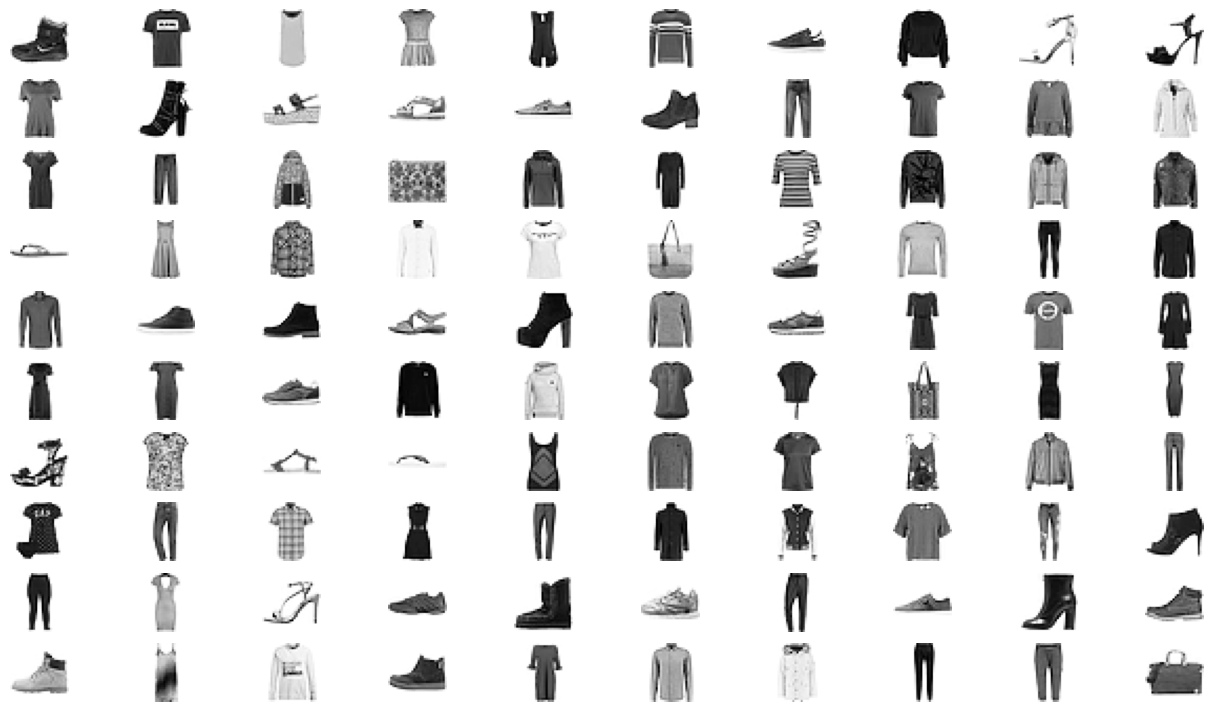

In [126]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

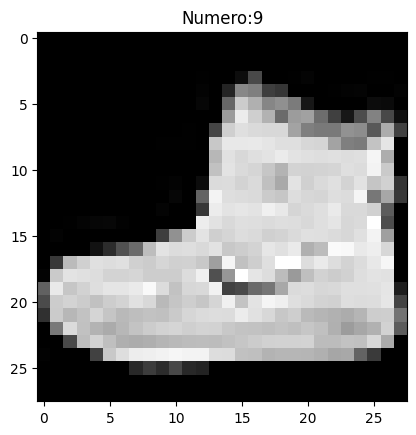

In [127]:
# Alumno, dibuje la primera imagen y su correspondiente categoria
plt.imshow(data_X_train[0], cmap='gray')
plt.title('Numero:' + str(data_y_train[0]))
plt.show()

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [128]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)
print(data_X_train[0][14, :])

[  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
 222 221 216 223 229 215 218 255  77   0]


In [129]:
# Alumno: Normalizar los datos entre 0 y 1
X_train_norm = data_X_train / 255
X_test_norm = data_X_test / 255

In [130]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)
print('Cantidad de datos en observación:', X_train_norm.shape[0])

Cantidad de datos en observación: 60000


In [131]:
# Alumno: Imprimir la dimension de la imagen
print('Dimensión de imagen:', X_train_norm[0].shape)

Dimensión de imagen: (28, 28)


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

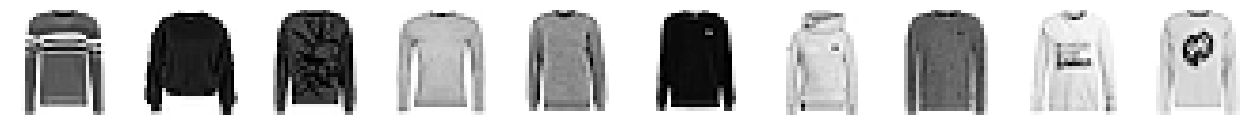

In [132]:
# Alumno: Explorar los primeros diez puloveres del dataset de train
fig = plt.figure(figsize= (16,9))

p = 0

for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.axis('off')

    while True:
        if data_y_train[p] == 2:
            ax.imshow(X_train_norm[p], cmap='Greys')
            p += 1
            break
        p += 1
plt.show()

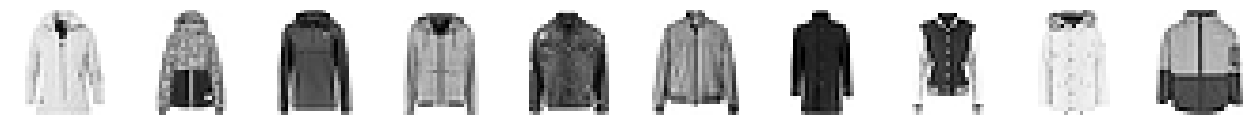

In [133]:
# Alumno: Explorar los primeros diez sacos del dataset de train
fig = plt.figure(figsize= (16,9))

s = 0

for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.axis('off')

    while True:
        if data_y_train[s] == 4:
            ax.imshow(X_train_norm[s], cmap='Greys')
            s += 1
            break
        s += 1
plt.show()


Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

#### Transformar los imagenes de 28x28 (2 dimensiones) en un array de una dimensión (28x28 = 784)
Esto se realiza porque las redes neuronales no soportan que se ingrese un array de dos dimensiones, solo soportan ingresar "N" features (un array)

In [134]:
# Alumno: Transformar el espacio de variable 28x28 a un vector de 784
# proceso de flatten --> transformar las imagenes en un vector de 1 dimension
num_pixels = X_train_norm.shape[1] * X_train_norm.shape[2]

X_train = X_train_norm.reshape(X_train_norm.shape[0], num_pixels).astype('float32')
X_test = X_test_norm.reshape(X_test_norm.shape[0], num_pixels).astype('float32')

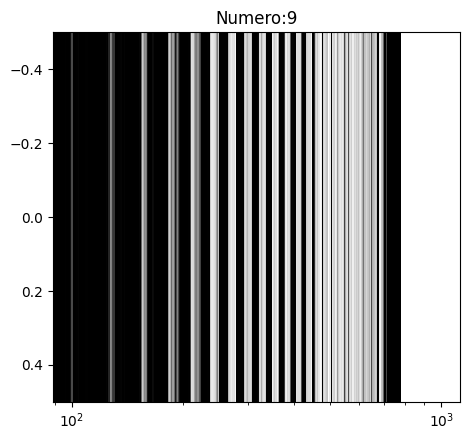

In [135]:
# Alumno: ¿Cómo se ve ahora nuestra primera imagen?
fig = plt.figure()
ax = fig.add_subplot()

ax.imshow(X_train[0].reshape(-1,1).T, cmap= 'gray')

ax.set_xscale("log")

plt.title('Numero:' + str(data_y_train[0]))
plt.show()

In [136]:
print('Datos en observacion:', X_train.shape)

Datos en observacion: (60000, 784)


Son 60000 vectores, cada vector representa lo mismo que una fila de un dataset. Cada fila o vector tiene 784 columnas

In [137]:
print('Dimensión de cada imagen faltten:', X_train[0].shape)

Dimensión de cada imagen faltten: (784,)


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [138]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test
y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)

In [139]:
# input shape
in_shape = X_train.shape[1]
in_shape

784

In [140]:
# output shape
out_shape = y_train.shape[1]
out_shape

10

In [141]:
from keras.layers import Dense, Dropout

# Alumno, crear un modelo con la cantidad de capas ocultas que crea
# mejor sin regularizacion

model = Sequential()
#5 capas ocultas
model.add(Dense(units= 64, activation= 'relu', input_shape= (in_shape,)))
model.add(Dense(units= 64, activation= 'relu'))
model.add(Dense(units= 64, activation= 'relu'))
model.add(Dense(units= 64, activation= 'relu'))
model.add(Dense(units= 64, activation= 'relu'))
model.add(Dense(units= out_shape, activation= 'softmax'))

model.compile(optimizer="Adam",
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 64)                50240     
                                                                 
 dense_47 (Dense)            (None, 64)                4160      
                                                                 
 dense_48 (Dense)            (None, 64)                4160      
                                                                 
 dense_49 (Dense)            (None, 64)                4160      
                                                                 
 dense_50 (Dense)            (None, 64)                4160      
                                                                 
 dense_51 (Dense)            (None, 10)                650       
                                                                 
Total params: 67530 (263.79 KB)
Trainable params: 6753

In [142]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.6341 - accuracy: 0.7731 - val_loss: 0.4563 - val_accuracy: 0.8402
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4154 - accuracy: 0.8523 - val_loss: 0.4551 - val_accuracy: 0.8353
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3759 - accuracy: 0.8634 - val_loss: 0.3666 - val_accuracy: 0.8674
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3456 - accuracy: 0.8734 - val_loss: 0.3489 - val_accuracy: 0.8730
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3228 - accuracy: 0.8811 - val_loss: 0.3439 - val_accuracy: 0.8763
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3087 - accuracy: 0.8863 - val_loss: 0.3384 - val_accuracy: 0.8781
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2992 - accuracy: 0.8893 - val_loss: 0.3396 - val_accuracy: 0.8746
Epoch 

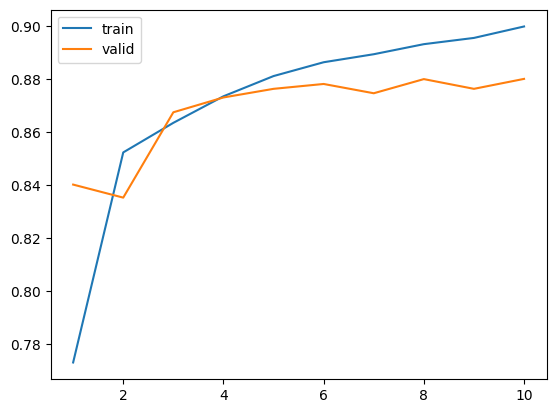

In [143]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [144]:
# Alumno: Tome el modelo anterior y agregue regularización
model = Sequential()

# Seleccione el dropout_ratev que mejor le funcione
dropout_rate = 0.2

#5 capas ocultas
model.add(Dense(units= 64, activation= 'relu', input_shape= (in_shape,)))

model.add(Dense(units= 64, activation= 'relu'))
model.add(Dropout(rate = dropout_rate))
model.add(Dense(units= 64, activation= 'relu'))
model.add(Dropout(rate = dropout_rate))
model.add(Dense(units= 64, activation= 'relu'))
model.add(Dropout(rate = dropout_rate))
model.add(Dense(units= 64, activation= 'relu'))
model.add(Dropout(rate = dropout_rate))

model.add(Dense(units= out_shape, activation= 'softmax'))

model.compile(optimizer="Adam",
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 64)                50240     
                                                                 
 dense_53 (Dense)            (None, 64)                4160      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_54 (Dense)            (None, 64)                4160      
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_55 (Dense)            (None, 64)                4160      
                                                                 
 dropout_18 (Dropout)        (None, 64)               

In [145]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 4s 5ms/step - loss: 0.9076 - accuracy: 0.6645 - val_loss: 0.5024 - val_accuracy: 0.8207
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.5231 - accuracy: 0.8210 - val_loss: 0.4336 - val_accuracy: 0.8456
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4587 - accuracy: 0.8404 - val_loss: 0.4073 - val_accuracy: 0.8580
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4304 - accuracy: 0.8510 - val_loss: 0.3767 - val_accuracy: 0.8662
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.4053 - accuracy: 0.8597 - val_loss: 0.3740 - val_accuracy: 0.8624
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3812 - accuracy: 0.8669 - val_loss: 0.3716 - val_accuracy: 0.8662
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3695 - accuracy: 0.8719 - val_loss: 0.3659 - val_accuracy: 0.8717
Epoch 

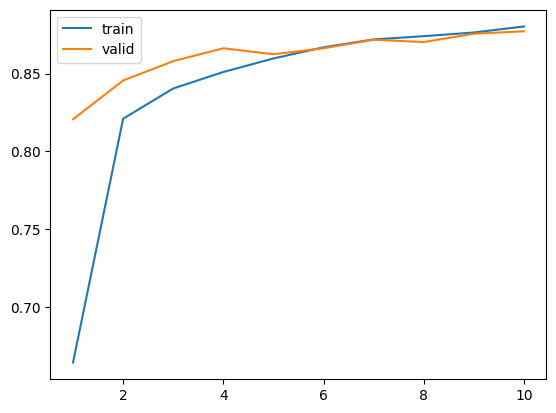

In [146]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [147]:
# Alumno: Predecir las probabilidades del dataset X_test
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

313/313 [==============================] - 1s 2ms/step


array([[2.00883142e-06, 2.66272782e-05, 1.99595015e-05, 5.44519480e-07,
        6.35345714e-05, 9.81706847e-03, 2.54474890e-06, 1.02031633e-01,
        3.57582794e-05, 8.88000250e-01],
       [6.87385182e-05, 2.71539804e-08, 9.78331685e-01, 2.03345826e-06,
        9.54817235e-03, 3.35190847e-10, 1.20492680e-02, 4.64765379e-12,
        1.02434875e-07, 1.21005839e-09],
       [1.11018589e-13, 1.00000000e+00, 1.24406790e-17, 1.05344023e-11,
        1.25831257e-13, 8.86603881e-30, 1.41614446e-16, 5.22336486e-21,
        1.23102247e-20, 4.96880032e-18]], dtype=float32)

In [148]:
# Alumno: Transformar las probabilidades en y_hat usando argmax
y_hat = np.argmax(y_hat_prob, axis=1)
y_hat[:3]

array([9, 2, 1])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [149]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)
score = model.evaluate(X_test, y_test)
score[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.3820 - accuracy: 0.8679


0.867900013923645

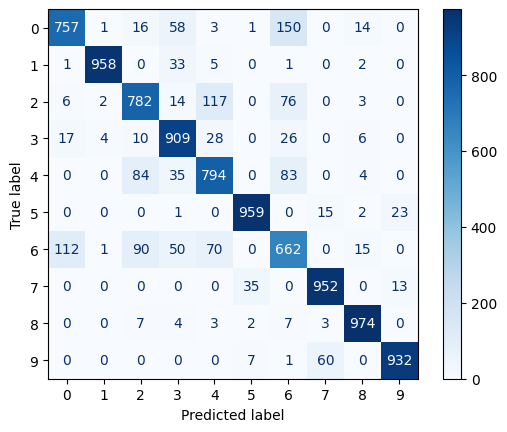

In [150]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [152]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]

In [157]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco
X_test_peores = X_test[rank_saco]
y_test_peores = y_test[rank_saco]

In [158]:
# Alumno: Calcular la exactitud de los sacos seleccionados
scores = model.evaluate(X_test_peores, y_test_peores)
scores[1]

1/1 [==============================] - 0s 26ms/step - loss: 2.0572 - accuracy: 0.2000


0.20000000298023224

In [159]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)
y_hat_prob = model.predict(X_test_peores)

y_hat_peores= np.argmax(y_hat_prob, axis=1)
y_hat_peores

1/1 [==============================] - 0s 79ms/step


array([2, 2, 2, 6, 4, 2, 2, 2, 4, 2])

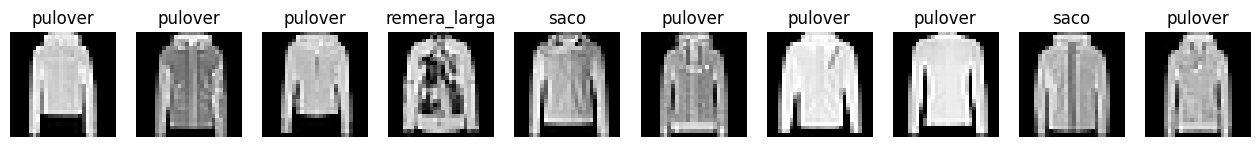

In [162]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría
fig = plt.figure(figsize = (16, 9))

s = 0

for i in rank_saco:
    ax = fig.add_subplot(1, 10, s+1)
    ax.axis('off')
    plt.imshow(X_test_norm[i], cmap= 'gray')
    ax.set_title(category_list[y_hat_peores[s]])
    s += 1
plt.show()

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Al utilizar deep larning no es posible diferenciar bien entre los sacos y los puloveres, el modelo es incapaz de ver los botones o los cierres que son la clave para diferenciarlos. Una alternativa es probar con redes más aptas para detección de imagenes (las CNN convolucionales, que veremos más adelante)